In [185]:
from pathlib import Path

import torch
import torch.nn as nn

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [186]:
n_samples = 1000
noise = .05
factor = .6
random_state = 82

X, y = make_circles(n_samples = n_samples,
             noise = noise,
             random_state=random_state,
             factor=factor)

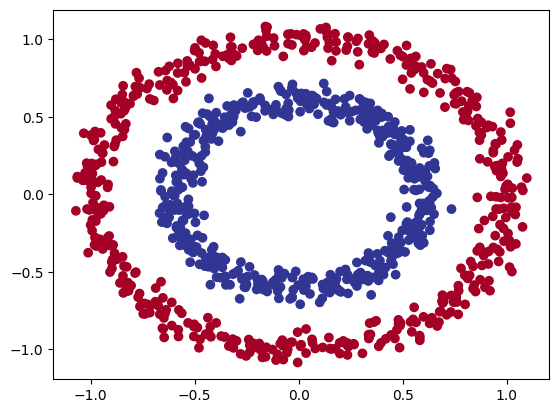

In [187]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [188]:
X.shape, y.shape

((1000, 2), (1000,))

In [189]:
X_sample, y_sample = X[0], y[0]

print(f"Example for a point sample {X_sample}, with label {y_sample}")
print(f"Data has {X.shape[0]} samples, with {X.shape[1]} features")

Example for a point sample [ 0.58185806 -0.29329201], with label 1
Data has 1000 samples, with 2 features


In [190]:
X_tensor = torch.from_numpy(X).type(dtype=torch.float)
y_tensor = torch.from_numpy(y).type(dtype=torch.float)

test_size = .2
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor,
                                                    test_size=test_size,
                                                    random_state=random_state)

In [191]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [192]:
class ClassifierModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2,
                                 out_features = 5)
        self.layer_2 = nn.Linear(in_features = 5,
                                 out_features = 1)
        
    def forward(self, X):
        return self.layer_2(self.layer_1(X))

In [193]:
model_0 = ClassifierModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5089, -0.0842],
                      [-0.5920, -0.2986],
                      [ 0.6459, -0.5017],
                      [ 0.0235, -0.4374],
                      [-0.3364,  0.5195]])),
             ('layer_1.bias',
              tensor([-0.3419,  0.1521,  0.3751, -0.3541, -0.2409])),
             ('layer_2.weight',
              tensor([[-0.0984, -0.0853,  0.0072,  0.3669,  0.3371]])),
             ('layer_2.bias', tensor([-0.2848]))])

In [194]:
def accuracy_fn(y_pred, y):
    return (y_pred == y).sum(dim = 0).item() / y_pred.shape[0]

In [195]:
learning_rate = .01

loss_fn_0 = nn.BCEWithLogitsLoss()

optimizer_0 = torch.optim.SGD(params=model_0.parameters(), lr=learning_rate)

In [196]:
def predict_prob(y_pred):
    return torch.round(torch.sigmoid(y_pred))

In [197]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device).unsqueeze(dim=1)
y_test = y_test.to(device).unsqueeze(dim=1)

In [198]:
epochs = 500

training_loss = []
testing_loss = []
accuracy_training = []

for epoch in range(epochs):
    ## Training 
    # 1. Training mode
    model_0.train()
    
    # 2. Forward
    y_pred = model_0(X_train)
    
    # 3. Calc loss 
    loss = loss_fn_0(y_pred, y_train)
    
    # 4. Zero grad()
    optimizer_0.zero_grad()
    
    # 5. Backpropagation
    loss.backward()
    
    # 6. Update param
    optimizer_0.step()
    
    ## Evaluation
    model_0.eval()
    with torch.inference_mode():
        y_pred_prob = predict_prob(y_pred)  # Predict prob training
        acc = accuracy_fn(y_pred_prob, y_train) # Accuracy training
        
        y_pred_test = model_0(X_test) # Forward test
        test_loss = loss_fn_0(y_pred_test, y_test) # Calc loss test
        
    training_loss.append(loss)
    testing_loss.append(test_loss)
    accuracy_training.append(acc)
    
    if epoch % 20 == 0:
        print(f"Loss {loss:.2f} | Accuracy {acc:.2f} | Loss test {test_loss:.2f}")
#         print(f"{loss} {acc} {test_loss}")

Loss 0.73 | Accuracy 0.49 | Loss test 0.70
Loss 0.72 | Accuracy 0.49 | Loss test 0.70
Loss 0.72 | Accuracy 0.49 | Loss test 0.69
Loss 0.71 | Accuracy 0.49 | Loss test 0.69
Loss 0.71 | Accuracy 0.49 | Loss test 0.69
Loss 0.71 | Accuracy 0.49 | Loss test 0.69
Loss 0.71 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.70 | Accuracy 0.49 | Loss test 0.69
Loss 0.69 | Accuracy 0.49 | Loss test 0.69
Loss 0.69 | Accuracy 0.49 | Loss test 0.69
Loss 0.69 | Accuracy 0.49 | Loss test 0.69
Loss 0.69 | Accuracy 0.48 | Loss test 0.69
Loss 0.69 | Accuracy 0.42 | Loss test 0.69
Loss 0.69 |

In [199]:
y_train.unsqueeze(dim=1).unsqueeze(dim=1).shape

torch.Size([800, 1, 1, 1])

In [200]:
y_test

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
      

In [201]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py is existing...")
else:
    print("Downloading helper_functions.py...")
    response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(response.content)
    print("Download finish.")

helper_functions.py is existing...


In [202]:
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import plot_predictions, plot_decision_boundary

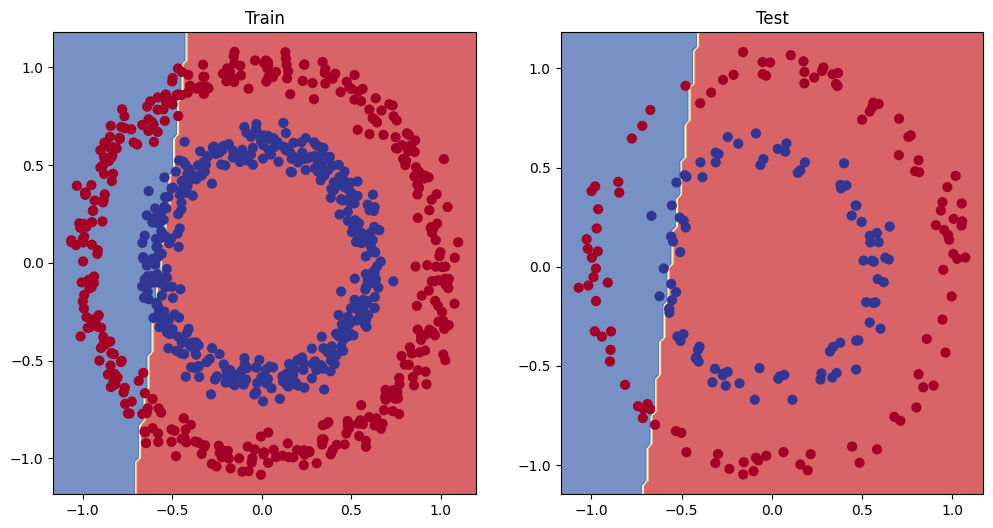

In [203]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

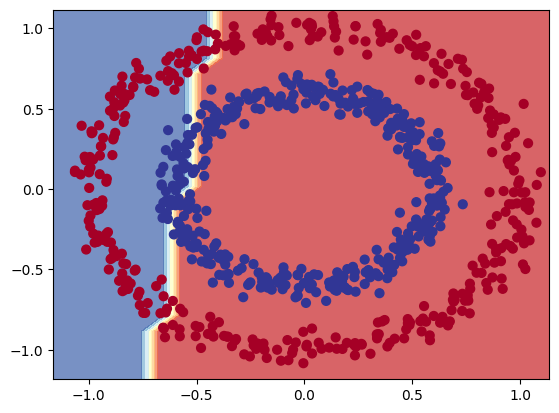

In [218]:
def sdef_plot_decision_boundary(model, X, y):
    
#     def _normalize(X):
#         X_copy = X.clone()
#         X_copy = torch.sigmoid(X_copy)
#         X_copy = torch.where(X > 0.6, 1, X)
#         X_copy = torch.where(X < 0.4, 0, X)
#         return X_copy
    
    X_min, X_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    
    xx, yy = np.meshgrid(np.arange(X_min, X_max, .1), np.arange(y_min, y_max, .1))
    input_x = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).type(dtype=torch.float32)
    
    with torch.inference_mode():
        y_pred = model(input_x)
        y_pred = torch.round(torch.sigmoid(y_pred))
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s = 40, cmap=plt.cm.RdYlBu)
    plt.show()
    
    

sdef_plot_decision_boundary(model_0, X_train, y_train)

In [219]:
xx, yy = np.meshgrid(np.arange(0, 1, .2), np.arange(0, 1, .2))
torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).shape

torch.Size([25, 2])

In [206]:
class ClassifierModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2, out_features = 10)
        self.layer_2 = nn.Linear(in_features=10, out_features = 5)
        self.layer_3 = nn.Linear(in_features=5, out_features = 1)
        
    def forward(self, X):
        return self.layer_3(self.layer_2(self.layer_1(X)))

In [207]:
model_1 = ClassifierModelV1()
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5290,  0.0554],
                      [ 0.1026, -0.1392],
                      [-0.0117, -0.0654],
                      [-0.5913, -0.0964],
                      [-0.6394,  0.4922],
                      [-0.0635,  0.0500],
                      [ 0.1821,  0.1385],
                      [ 0.5307,  0.2366],
                      [ 0.0948, -0.4390],
                      [ 0.6653,  0.3481]])),
             ('layer_1.bias',
              tensor([-0.0851, -0.5968, -0.4711,  0.1875,  0.4910, -0.3837,  0.4785,  0.4909,
                       0.5283,  0.3114])),
             ('layer_2.weight',
              tensor([[-0.0375,  0.1891, -0.2005,  0.3126, -0.2740, -0.0747,  0.2826, -0.0708,
                        0.0166,  0.2837],
                      [ 0.0250, -0.0718,  0.1021,  0.0053,  0.2334,  0.2940, -0.2151, -0.1154,
                        0.1162, -0.2970],
                      [ 0.0418,  0.3146, -0.2323,  0.2515, -0.0672,  0.0

In [208]:
loss_fn_2 = nn.BCEWithLogitsLoss()

optimizer_2 = torch.optim.SGD(params=model_1.parameters(), lr=learning_rate)

In [223]:
# X_train = X_train.to(device)
# y_train = y_train.to(device).unsqueeze(dim=1)
# X_test = X_test.to(device)
# y_test = y_test.to(device).unsqueeze(dim=1)

epochs = 600

for epoch in range(epochs + 1):
    
    model_1.train()
    y_pred = model_1(X_train)
    train_loss = loss_fn_2(y_pred, y_train)
    
    optimizer_2.zero_grad()
    train_loss.backward()
    optimizer_2.step()
    
    model_1.eval()
    with torch.inference_mode():
        train_pred_prob = predict_prob(y_pred)
        acc_train = accuracy_fn(train_pred_prob, y_train)
        
        test_pred = model_1(X_test)
        test_loss = loss_fn_2(test_pred, y_test)
        test_pred_prob = predict_prob(test_pred)
        acc_test = accuracy_fn(test_pred_prob, y_test)
        
    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss train: {train_loss:.2f}, Accuracy {acc_train:.2f} | Loss test: {test_loss:.2f}, Accuracy {acc_test:.2f}")
        
    

Epoch 0 | Loss train: 0.69, Accuracy 0.55 | Loss test: 0.70, Accuracy 0.48
Epoch 20 | Loss train: 0.69, Accuracy 0.55 | Loss test: 0.70, Accuracy 0.49
Epoch 40 | Loss train: 0.69, Accuracy 0.54 | Loss test: 0.70, Accuracy 0.49
Epoch 60 | Loss train: 0.69, Accuracy 0.54 | Loss test: 0.70, Accuracy 0.49
Epoch 80 | Loss train: 0.69, Accuracy 0.54 | Loss test: 0.70, Accuracy 0.49
Epoch 100 | Loss train: 0.69, Accuracy 0.55 | Loss test: 0.70, Accuracy 0.49
Epoch 120 | Loss train: 0.69, Accuracy 0.54 | Loss test: 0.70, Accuracy 0.49
Epoch 140 | Loss train: 0.69, Accuracy 0.55 | Loss test: 0.70, Accuracy 0.49
Epoch 160 | Loss train: 0.69, Accuracy 0.55 | Loss test: 0.70, Accuracy 0.49
Epoch 180 | Loss train: 0.69, Accuracy 0.55 | Loss test: 0.70, Accuracy 0.49
Epoch 200 | Loss train: 0.69, Accuracy 0.55 | Loss test: 0.70, Accuracy 0.49
Epoch 220 | Loss train: 0.69, Accuracy 0.55 | Loss test: 0.70, Accuracy 0.49
Epoch 240 | Loss train: 0.69, Accuracy 0.55 | Loss test: 0.70, Accuracy 0.49
Epoch

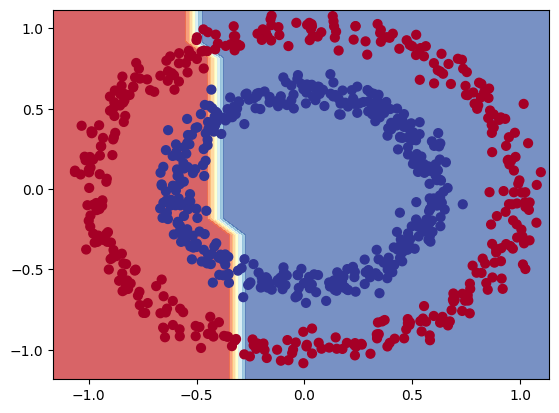

In [224]:
sdef_plot_decision_boundary(model_1, X_train, y_train)

In [251]:
class ClassifierModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2, out_features = 10)
        self.layer_2 = nn.Linear(in_features=10, out_features = 5)
        self.layer_3 = nn.Linear(in_features=5, out_features = 1)
        
    def forward(self, X):
        X1 = self.layer_1(X)
        X1 = torch.where(X1 > 0, X1, 0)
        
        X2 = self.layer_2(X1)
        X2 = torch.where(X2 > 0, X2, 0)
        
        return self.layer_3(X2)
        

In [252]:
model_2 = ClassifierModelV2()
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.6530, -0.4512],
                      [-0.2132,  0.1884],
                      [-0.4721, -0.5336],
                      [ 0.1890, -0.5633],
                      [-0.6985, -0.5338],
                      [-0.2432, -0.3161],
                      [-0.1835,  0.6322],
                      [ 0.0802,  0.0669],
                      [-0.3450, -0.6892],
                      [ 0.2622, -0.3640]])),
             ('layer_1.bias',
              tensor([ 0.4174,  0.6462, -0.3417, -0.1939, -0.2578,  0.6947,  0.6913,  0.5022,
                      -0.6389, -0.4024])),
             ('layer_2.weight',
              tensor([[-0.2594,  0.2455,  0.1588, -0.2436, -0.0608, -0.1323,  0.1523, -0.1075,
                       -0.0281, -0.2580],
                      [-0.0283,  0.1663, -0.0066, -0.1766,  0.3044, -0.0338,  0.1233,  0.2771,
                       -0.1861, -0.0999],
                      [-0.0099, -0.0047, -0.0522, -0.0028, -0.0258,  0.1

In [253]:
loss_fn_3 = nn.BCEWithLogitsLoss()

optimizer_3 = torch.optim.SGD(params=model_2.parameters(), lr=.01)

In [264]:
# X_train = X_train.to(device)
# y_train = y_train.to(device).unsqueeze(dim=1)
# X_test = X_test.to(device)
# y_test = y_test.to(device).unsqueeze(dim=1)

epochs = 1000

for epoch in range(epochs + 1):
    
    model_2.train()
    y_pred = model_2(X_train)
    train_loss = loss_fn_3(y_pred, y_train)
    
    optimizer_3.zero_grad()
    train_loss.backward()
    optimizer_3.step()
    
    model_2.eval()
    with torch.inference_mode():
        train_pred_prob = predict_prob(y_pred)
        acc_train = accuracy_fn(train_pred_prob, y_train)
        
        test_pred = model_2(X_test)
        test_loss = loss_fn_3(test_pred, y_test)
        test_pred_prob = predict_prob(test_pred)
        acc_test = accuracy_fn(test_pred_prob, y_test)
        
    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss train: {train_loss:.2f}, Accuracy {acc_train:.2f} | Loss test: {test_loss:.2f}, Accuracy {acc_test:.2f}")
        
    

Epoch 0 | Loss train: 0.20, Accuracy 1.00 | Loss test: 0.19, Accuracy 1.00
Epoch 20 | Loss train: 0.20, Accuracy 1.00 | Loss test: 0.19, Accuracy 1.00
Epoch 40 | Loss train: 0.19, Accuracy 1.00 | Loss test: 0.18, Accuracy 1.00
Epoch 60 | Loss train: 0.19, Accuracy 1.00 | Loss test: 0.18, Accuracy 1.00
Epoch 80 | Loss train: 0.19, Accuracy 1.00 | Loss test: 0.18, Accuracy 1.00
Epoch 100 | Loss train: 0.18, Accuracy 1.00 | Loss test: 0.17, Accuracy 1.00
Epoch 120 | Loss train: 0.18, Accuracy 1.00 | Loss test: 0.17, Accuracy 1.00
Epoch 140 | Loss train: 0.17, Accuracy 1.00 | Loss test: 0.17, Accuracy 1.00
Epoch 160 | Loss train: 0.17, Accuracy 1.00 | Loss test: 0.16, Accuracy 1.00
Epoch 180 | Loss train: 0.17, Accuracy 1.00 | Loss test: 0.16, Accuracy 1.00
Epoch 200 | Loss train: 0.17, Accuracy 1.00 | Loss test: 0.16, Accuracy 1.00
Epoch 220 | Loss train: 0.16, Accuracy 1.00 | Loss test: 0.15, Accuracy 1.00
Epoch 240 | Loss train: 0.16, Accuracy 1.00 | Loss test: 0.15, Accuracy 1.00
Epoch

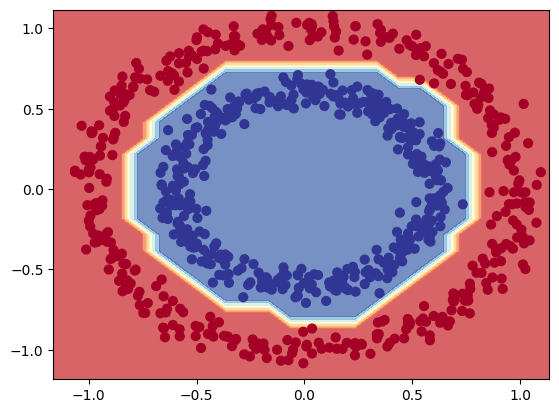

In [265]:
sdef_plot_decision_boundary(model_2, X_train, y_train)

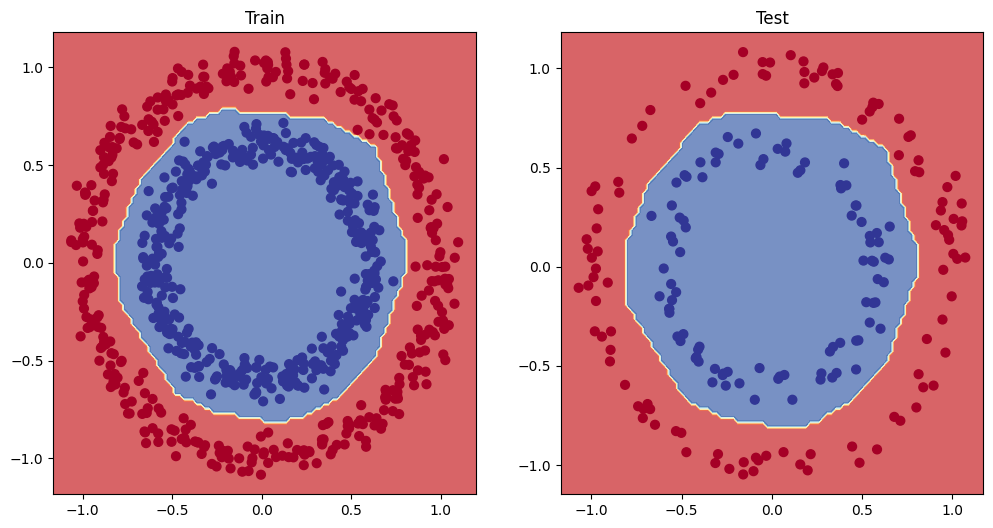

In [266]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

In [222]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from pathlib import Path

In [223]:
random_state = 82

n_samples = 500
n_features = 2
n_class = 4
std = 1


X, y = make_blobs(n_samples=n_samples,
           n_features=n_features,
           centers=n_class, 
           cluster_std=std,
           random_state=random_state)

In [224]:
test_size = .3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=random_state)

In [225]:
def visualize_predict(X_train=X_train,
                      y_train=y_train,
                      X_test=X_test,
                      y_test=y_test,
                      plot_test=False):
    if plot_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
        alpha = .3
    else:
        alpha = 1
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=alpha)

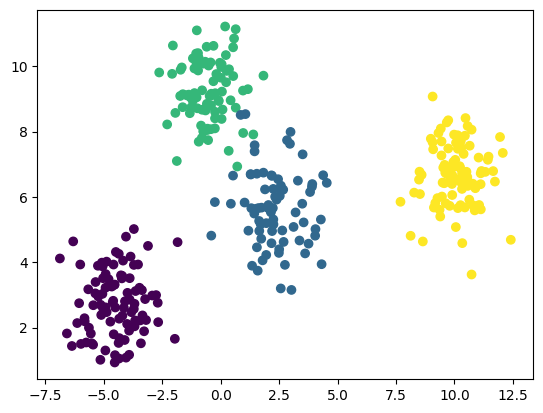

In [226]:
visualize_predict(plot_test=False)

In [227]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features, n_class, hidden_units = 5):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = in_features, out_features = hidden_units)
        self.layer_2 = nn.Linear(in_features = hidden_units, out_features = hidden_units)
        self.layer_3 = nn.Linear(in_features = hidden_units, out_features = n_class)
        
    def forward(self, X):
        X = self.layer_1(X)
        X = F.relu(X)
        X = self.layer_2(X)
        X = F.relu(X)
        return self.layer_3(X)

In [228]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = ClassifierModel(in_features = n_features, n_class = n_class).to(device)
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.5942,  0.4156],
                      [ 0.1263, -0.6128],
                      [ 0.5808,  0.1037],
                      [ 0.6819, -0.2646],
                      [-0.3557,  0.1578]])),
             ('layer_1.bias',
              tensor([ 0.6169,  0.5375, -0.5834,  0.6005, -0.7035])),
             ('layer_2.weight',
              tensor([[ 0.0162, -0.1793, -0.2136, -0.0257,  0.0465],
                      [-0.1340,  0.2674,  0.4425,  0.0150, -0.0035],
                      [ 0.0628, -0.0524, -0.4100,  0.2631,  0.4155],
                      [-0.4003, -0.0792,  0.0815,  0.0899, -0.2302],
                      [-0.4279, -0.1684,  0.2319, -0.0393, -0.3328]])),
             ('layer_2.bias',
              tensor([-0.0670, -0.0187, -0.2851,  0.4354, -0.0638])),
             ('layer_3.weight',
              tensor([[ 0.3635, -0.2530, -0.2698,  0.0090,  0.1441],
                      [-0.1116, -0.1798,  0.0429,  0.4210, -0.1635],
     

In [229]:
model

ClassifierModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=4, bias=True)
)

In [230]:
lr = .03
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=lr)

def accuracy_fn(y_pred, y_true):
    return ((y_pred == y_true).sum() / len(y_true)).item()



In [231]:
X_train = torch.from_numpy(X_train).type(dtype=torch.float32).to(device)
X_test = torch.from_numpy(X_test).type(dtype=torch.float32).to(device)
y_train = torch.from_numpy(y_train).type(dtype=torch.long).to(device)
y_test = torch.from_numpy(y_test).type(dtype=torch.long).to(device)

In [232]:
## One hot encoder

# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder()

# y_train_onehot = torch.from_numpy(encoder.fit_transform(y_train).toarray()).type(dtype=torch.float32).to(device)
# y_test_onehot = torch.from_numpy(encoder.fit_transform(y_test).toarray()).type(dtype=torch.float32).to(device)

In [233]:

epochs = 1000
# y_train_loss = y_train.squeeze().type(torch.long)
# y_test_loss = y_test.squeeze().type(torch.long)

train_loss = []
test_loss = []
train_acc = []
test_acc = []


for epoch in range(epochs + 1):
    model.train()
    
    y_pred = model(X_train)
    y_pred_prob = torch.softmax(y_pred, dim=1)
    y_pred_max = y_pred_prob.argmax(dim=1)
    
    loss_train = loss_fn(y_pred_prob, y_train)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    
    model.eval()
    with torch.inference_mode():
        acc_train = accuracy_fn(y_pred_max, y_train)
        
        y_pred_test = model(X_test)
        y_pred_prob_test = torch.softmax(y_pred_test, dim = 1)
        y_pred_max_test = y_pred_prob_test.argmax(dim=1)
        
        loss_test = loss_fn(y_pred_prob_test, y_test)
        acc_test = accuracy_fn(y_pred_max_test, y_test)
        
    
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Loss train {loss_train:.4f}, Accuracy train {acc_train:.4f} | Loss test {loss_test:.4f}, Accuracy test {acc_test:.4f}")
        train_loss.append(loss_train)
        test_loss.append(loss_test)
        train_acc.append(acc_train)
        test_acc.append(acc_test)


Epoch 0 | Loss train 1.4257, Accuracy train 0.0029 | Loss test 1.4329, Accuracy test 0.0000
Epoch 20 | Loss train 1.3638, Accuracy train 0.5343 | Loss test 1.3827, Accuracy test 0.4200
Epoch 40 | Loss train 1.3023, Accuracy train 0.5343 | Loss test 1.3356, Accuracy test 0.4200
Epoch 60 | Loss train 1.2418, Accuracy train 0.5343 | Loss test 1.2911, Accuracy test 0.4200
Epoch 80 | Loss train 1.2089, Accuracy train 0.5343 | Loss test 1.2696, Accuracy test 0.4200
Epoch 100 | Loss train 1.1890, Accuracy train 0.5343 | Loss test 1.2574, Accuracy test 0.4200
Epoch 120 | Loss train 1.1746, Accuracy train 0.5343 | Loss test 1.2485, Accuracy test 0.4200
Epoch 140 | Loss train 1.1636, Accuracy train 0.5343 | Loss test 1.2408, Accuracy test 0.4200
Epoch 160 | Loss train 1.1539, Accuracy train 0.5343 | Loss test 1.2331, Accuracy test 0.4200
Epoch 180 | Loss train 1.1448, Accuracy train 0.5343 | Loss test 1.2245, Accuracy test 0.4200
Epoch 200 | Loss train 1.1359, Accuracy train 0.5343 | Loss test 1

In [234]:
def visualize_decision_boundary(model, X, y):
    X_min, X_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(X_min, X_max, .1), np.arange(y_min, y_max, .1))
    
    z = np.c_[xx.ravel(), yy.ravel()]
    z = torch.from_numpy(z).type(torch.float32).to(device)
    z = torch.softmax(model(z), dim = 1).argmax(dim = 1)
    z = z.reshape(xx.shape)
    
    plt.contourf(xx, yy, z, alpha=.5)
    
    plt.xlim(X_min, X_max)
    plt.ylim(y_min, y_max)
    visualize_predict(plot_test=False)
    plt.show()
    
    

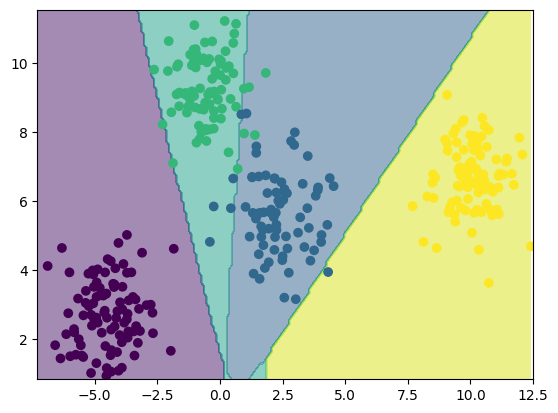

In [235]:

visualize_decision_boundary(model, X, y)

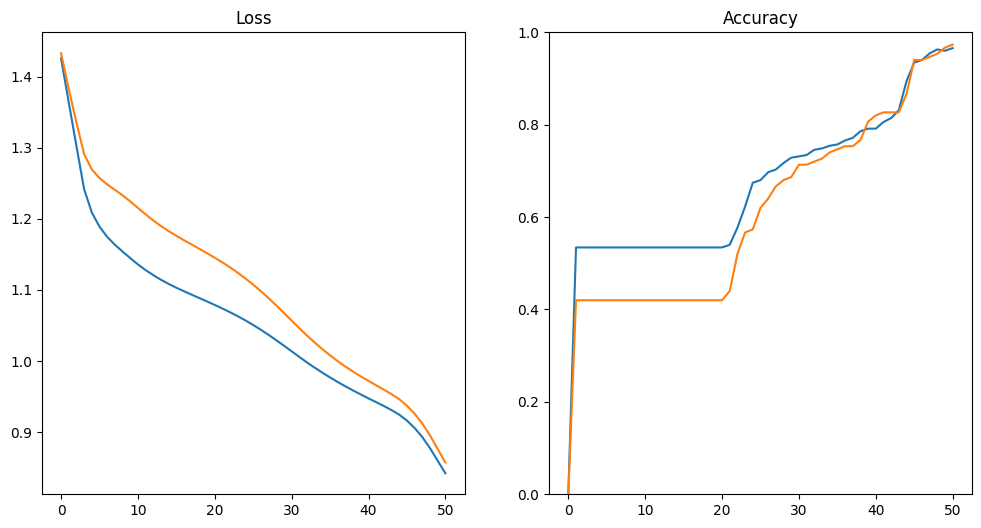

In [236]:
with torch.no_grad():
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(train_loss)), train_loss, label="Training loss")
    plt.plot(range(len(test_loss)), test_loss, label="Testing loss")
    plt.title("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(range(len(train_acc)), train_acc, label="Training Accuracy")
    plt.plot(range(len(test_acc)), test_acc, label="Testing Accuracy")
    plt.title("Accuracy")
    plt.ylim(0, 1)